In [1]:
from wrangle import *

In [3]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [16]:
def get_lower_and_upper_bounds(series,multiplier):
    Q3 = np.quantile(series, 0.75)
    Q1 = np.quantile(series, 0.25)
    iqr = Q3 - Q1
    
    upper_bound = Q3+(multiplier*iqr)
    lower_bound = Q1-(multiplier*iqr)
    
    return lower_bound, upper_bound

# Question: 1

In [17]:
upper_bound, lower_bound = get_lower_and_upper_bounds(df["Rainfall"],1.5)

# Question: 2

In [20]:
norm = df['Rainfall']

In [39]:
SD = norm.std()
norm_median = norm.median()

In [52]:
total_count = norm.shape[0]

In [58]:
one_sd_count = df[(norm >= (norm_median-SD)) & (norm <= (norm_median+SD))].shape[0]

In [59]:
two_sd_count = df[(norm >= (norm_median-(SD*2))) & (norm <= (norm_median+(SD*2)))].shape[0]

In [60]:
three_sd_count = df[(norm >= (norm_median-(SD*3))) & (norm <= (norm_median+(SD*3)))].shape[0]

In [65]:
one_sd_proportion = one_sd_count/total_count

In [66]:
two_sd_proportion = two_sd_count/total_count

In [67]:
three_sd_proportion = three_sd_count/total_count

In [70]:
normal_distribution = [68,95,99.7]

In [69]:
one_sd_proportion,two_sd_proportion,three_sd_proportion

(0.8191780821917808, 0.9232876712328767, 0.9863013698630136)

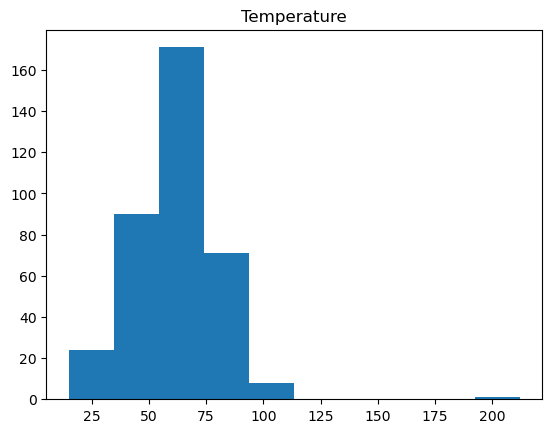

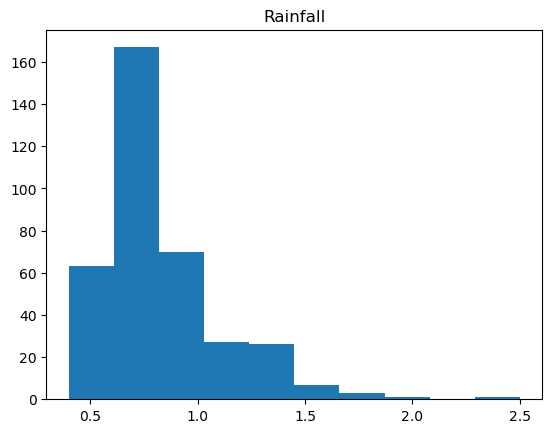

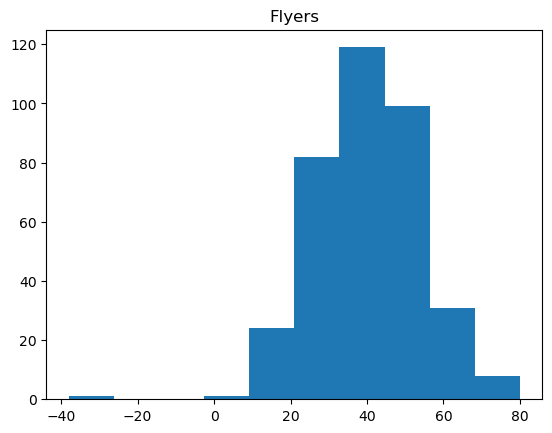

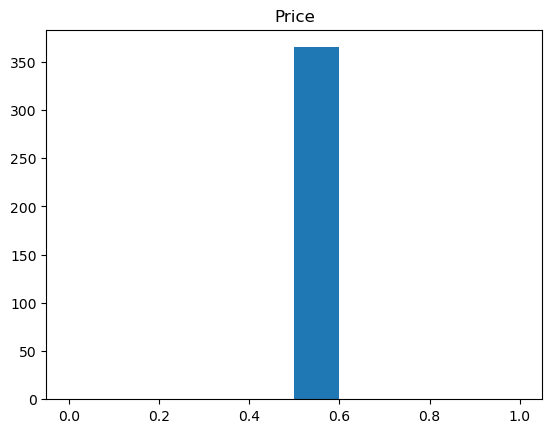

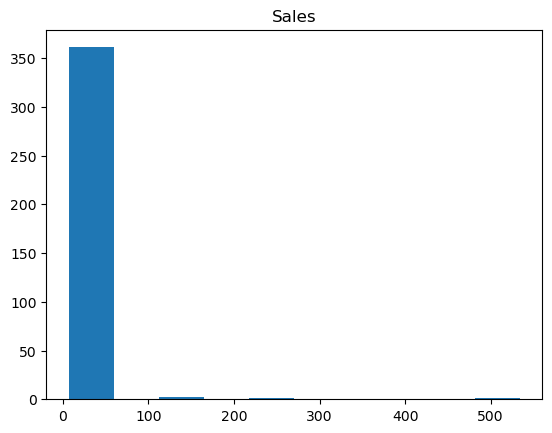

In [78]:
for feature in df.select_dtypes(include=['number']):
    plt.hist(df[feature])
    plt.title(feature)
    plt.show()

# Question 3
Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [80]:
normal_features = ['Temperature','Rainfall','Flyers']

In [86]:
def isolate_outliers(df):
    SD = df.std()
    norm_median = df.median()
    
    outside_of_three_sd = df[(df <= (norm_median-(SD*3))) & (df >= (norm_median+(SD*3)))]
    
    return outside_of_three_sd

In [87]:
isolate_outliers(df['Flyers'])

Series([], Name: Flyers, dtype: int64)

In [102]:
for i in normal_features:
    print(f"Outliers in {i}:")
    norm = df[i]
    norm_median = norm.median()
    SD = norm.std()
    outside_of_three_sd = df[(norm <= (norm_median-(SD*3))) & (norm >= (norm_median+(SD*3)))]
    print(outside_of_three_sd)
    print()

Outliers in Temperature:
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Outliers in Rainfall:
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

Outliers in Flyers:
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []

